In [258]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from onix.analysis.laser_linewidth import LaserLinewidth

In [259]:
data, headers = get_experiment_data(149)
resolution = 2e-6
discriminator_slope = 0.3 / 1e6  # 0.3 V / MHz
voltages = data["quarto_voltages"]
laser = LaserLinewidth(data["quarto_voltages"], resolution, discriminator_slope)

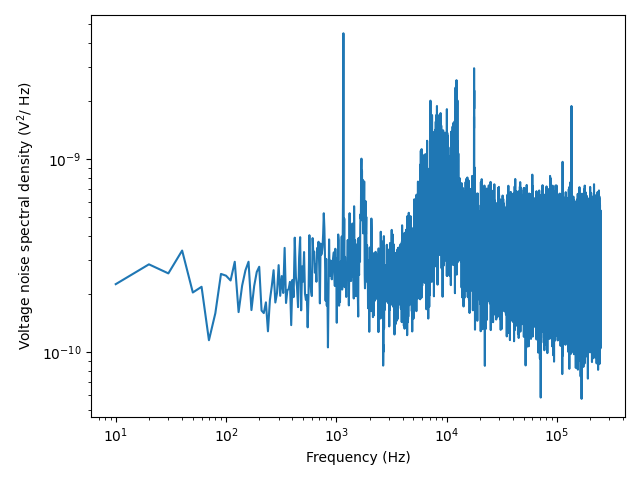

In [260]:
fig, ax = plt.subplots()
ax.plot(laser.f, laser.W_V)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Voltage noise spectral density (V$^2$/ Hz)")
plt.tight_layout()
plt.show()

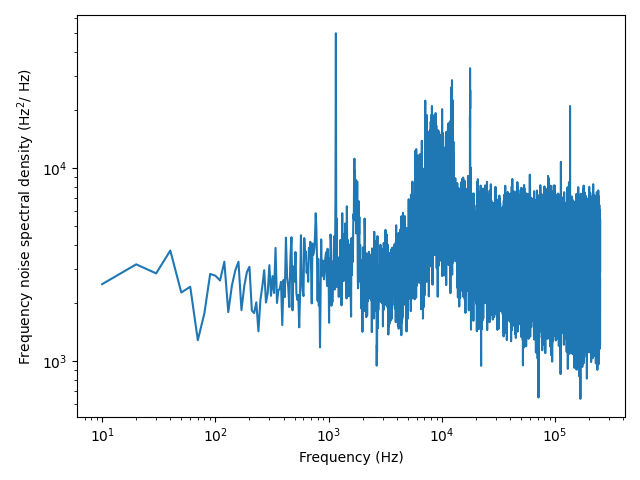

In [261]:
fig, ax = plt.subplots()
ax.plot(laser.f, laser.W_nu)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Frequency noise spectral density (Hz$^2$/ Hz)")
plt.tight_layout()
plt.show()

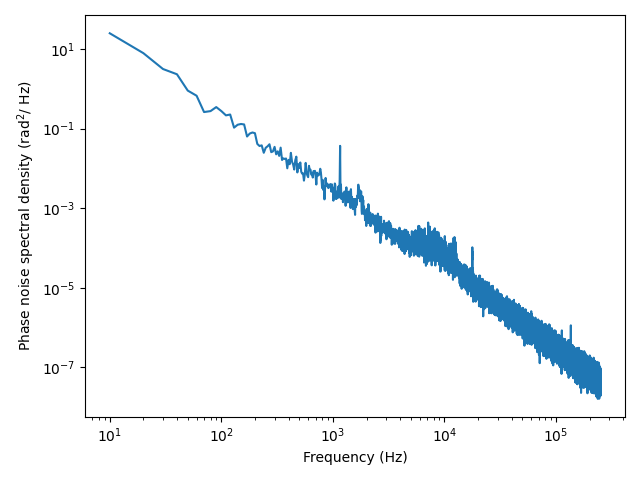

In [262]:
fig, ax = plt.subplots()
ax.plot(laser.f, laser.W_phi)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Phase noise spectral density (rad$^2$/ Hz)")
plt.tight_layout()
plt.show()

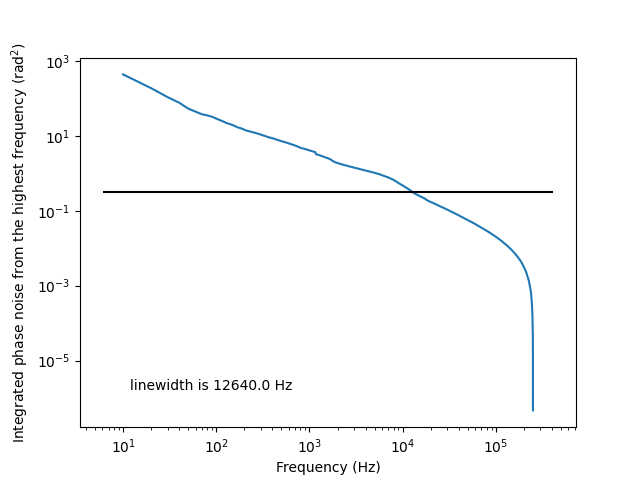

In [263]:
fig, ax = plt.subplots()
ax.plot(laser.f, laser.W_phi_integral)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Integrated phase noise from the highest frequency (rad$^2$)")
ax.xaxis.use_sticky_edges = True
ax.hlines(1 / np.pi, *ax.get_xlim(), color="k")

ax.text(0.1, 0.1, f"linewidth is {laser.linewidth} Hz", transform=ax.transAxes)
plt.show()

## Simulation to verify the code

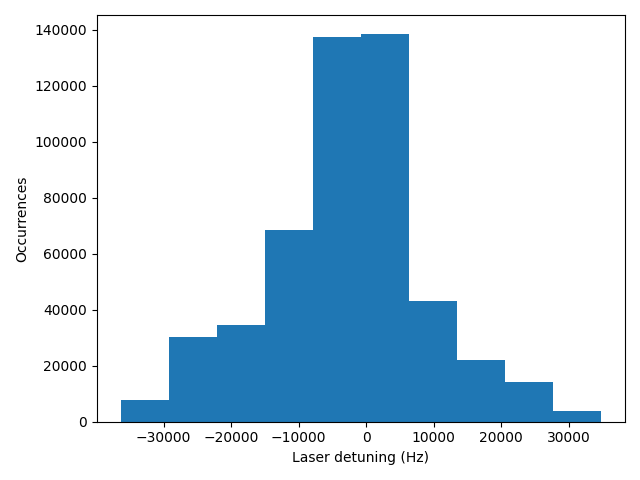

In [264]:
sim_sample_time = 2e-6  # 2 us
sim_samples = 50000
sim_duration = sim_sample_time * sim_samples
sim_repeats = 10
sim_laser_linewidth = 1e3

def get_random_walk_noise(samples, sample_time, linewidth):
    """Not certain if this is correct."""
    linewidth_time = 1 / (2 * np.pi * linewidth)
    random_walk_step_size = linewidth * np.sqrt(sample_time / linewidth_time)
    value_now = 0
    data = np.zeros(samples)
    random_steps = np.random.rand(samples) > 0.5
    for kk in range(samples):
        if random_steps[kk]:
            data[kk] = value_now + random_walk_step_size
        else:
            data[kk] = value_now - random_walk_step_size
        value_now = data[kk]
    return data

sim_laser_frequencies = np.array(
    [get_random_walk_noise(sim_samples, sim_sample_time, sim_laser_linewidth) for kk in range(sim_repeats)]
)
fig, ax = plt.subplots()
ax.hist(sim_laser_frequencies.flatten())
ax.set_xlabel("Laser detuning (Hz)")
ax.set_ylabel("Occurrences")
plt.tight_layout()
plt.show()

sim_discriminator_slope = 1 / 1e6  # 1 V / MHz
sim_error_signals = sim_laser_frequencies * sim_discriminator_slope

In [265]:
sim_1 = LaserLinewidth(sim_error_signals, sim_sample_time, sim_discriminator_slope)

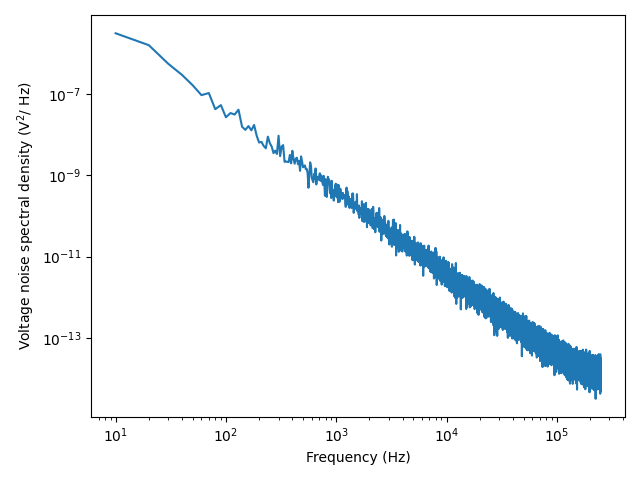

In [266]:
fig, ax = plt.subplots()
ax.plot(sim_1.f, sim_1.W_V)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Voltage noise spectral density (V$^2$/ Hz)")
plt.tight_layout()
plt.show()

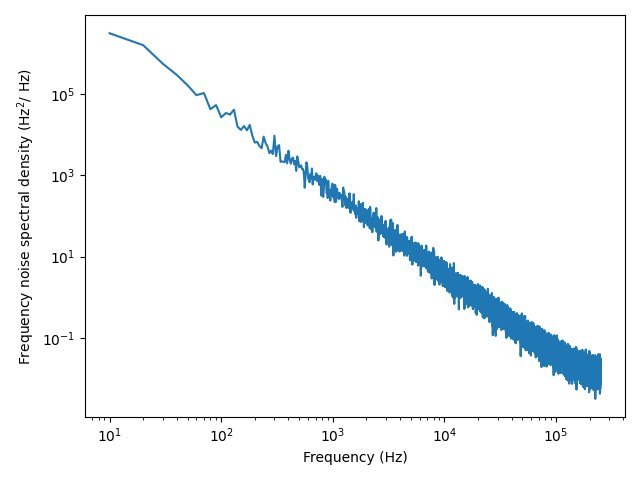

In [267]:
fig, ax = plt.subplots()
ax.plot(sim_1.f, sim_1.W_nu)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Frequency noise spectral density (Hz$^2$/ Hz)")
plt.tight_layout()
plt.show()

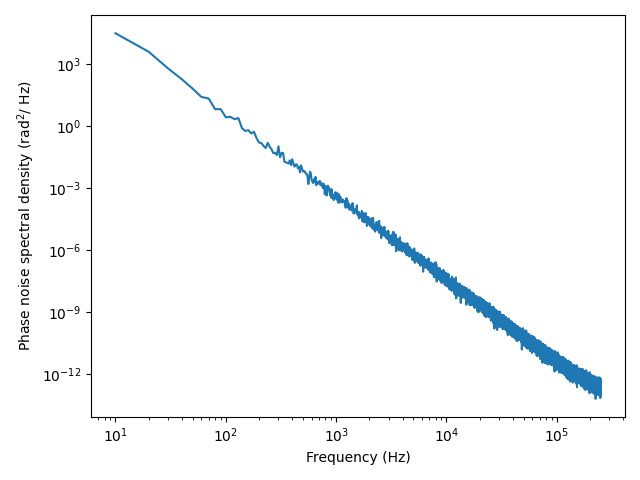

In [268]:
fig, ax = plt.subplots()
ax.plot(sim_1.f, sim_1.W_phi)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Phase noise spectral density (rad$^2$/ Hz)")
plt.tight_layout()
plt.show()

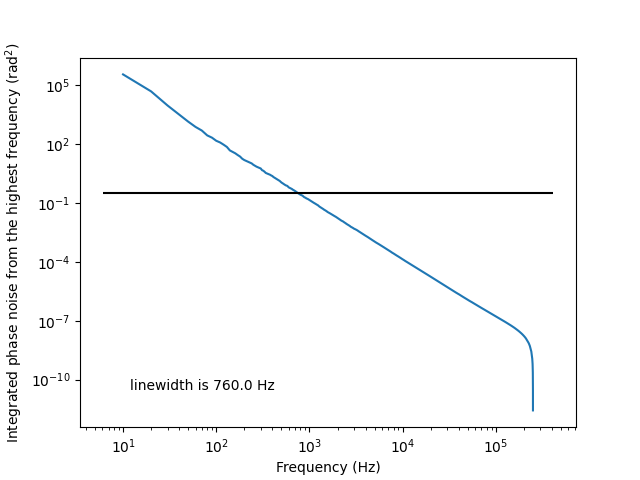

In [269]:
fig, ax = plt.subplots()
ax.plot(sim_1.f, sim_1.W_phi_integral)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Integrated phase noise from the highest frequency (rad$^2$)")
ax.xaxis.use_sticky_edges = True
ax.hlines(1 / np.pi, *ax.get_xlim(), color="k")

ax.text(0.1, 0.1, f"linewidth is {sim_1.linewidth} Hz", transform=ax.transAxes)
plt.show()